In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer

In [2]:
data = pd.read_csv('Fish.csv')

In [3]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
print(data['Species'].unique())

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [5]:
data.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [6]:
x =data[['Species','Length1','Length2','Length3','Height','Width']].values

In [7]:
y = data[['Weight']].values

In [8]:
st = ColumnTransformer([('Species',OneHotEncoder(),[0])],remainder='passthrough')

In [9]:
x = st.fit_transform(x)

In [10]:
# x = x.reshape(-1,1)

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [12]:
model = LinearRegression()

In [13]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
y_predict = model.predict(x_test)

In [15]:
y_predict

array([[-185.954449  ],
       [ 427.93179571],
       [ 175.94777773],
       [ 742.0409765 ],
       [ 594.12376221],
       [ 498.89834955],
       [ 580.20137438],
       [ 982.96964354],
       [ 641.43818778],
       [ 169.67496085],
       [ 458.24681868],
       [  25.00342054],
       [ 458.91144329],
       [ 300.09439237],
       [ 715.33015581],
       [ 627.43843574],
       [ 877.29271274],
       [ 852.62469563],
       [  44.05162023],
       [1000.2065443 ],
       [   8.72828001],
       [ 520.55221282],
       [ 797.3534124 ],
       [ 614.94041003],
       [ 660.93575905],
       [ 134.18545967],
       [ 665.21436262],
       [ 718.61179585],
       [ 527.13265669],
       [  18.28122309],
       [ 781.90465848],
       [ 359.00397656]])

In [16]:
print(y_predict.sum().mean())
print(y_test.sum().mean())

print("So called Accuracy ", y_predict.sum().mean()/y_test.sum().mean())

15793.316825840015
15620.7
So called Accuracy  1.0110505179563025


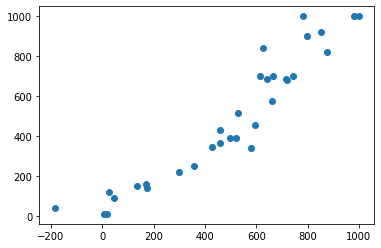

In [23]:
plt.scatter(y_predict,y_test)
plt.show()